In [1]:
import pandas as pd
import numpy as np
import mlflow

import mlflow.prophet
from mlflow.tracking import MlflowClient
from prophet import Prophet

from models.prophet.forecaster import Forecaster
from scraping_utils.gas_prices import GasPrices

In [2]:
gas_prices = GasPrices.get_data()

In [3]:
gas_prices

,GAS NATURALE
2017-10-23,18.150000
2017-10-30,18.309999
2017-11-06,19.820000
2017-11-13,18.950001
2017-11-20,20.455000
...,...
2023-07-24,25.841000
2023-07-31,28.853001
2023-08-07,35.299999
2023-08-14,36.410000


In [4]:
forecaster = Forecaster()

forecaster.train_model(train_df=gas_prices, target_col="GAS NATURALE", experiment_name="gas_model")


2023/08/27 20:10:02 INFO mlflow.tracking.fluent: Experiment with name 'gas_model' does not exist. Creating a new experiment.
20:10:02 - cmdstanpy - INFO - Chain [1] start processing
20:10:02 - cmdstanpy - INFO - Chain [1] done processing
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing
20:10:03 - cmdstanpy - INFO - Chain [1] done processing


Logged Metrics: 
{
  "mse": 8296.778072977897,
  "rmse": 83.75287487971941,
  "mae": 67.47989319164562,
  "mape": 1.2093071992021953,
  "mdape": 0.5236331875247136,
  "smape": 0.6595173854432415,
  "coverage": 0.04815789473684216
}
Logged Params: 
{
  "growth": "linear",
  "n_changepoints": 25,
  "specified_changepoints": false,
  "changepoint_range": 0.8,
  "yearly_seasonality": "auto",
  "weekly_seasonality": "auto",
  "daily_seasonality": "auto",
  "seasonality_mode": "additive",
  "seasonality_prior_scale": 10.0,
  "changepoint_prior_scale": 0.05,
  "holidays_prior_scale": 10.0,
  "mcmc_samples": 0,
  "interval_width": 0.8,
  "uncertainty_samples": 1000,
  "y_scale": 339.1960144042969,
  "logistic_floor": false,
  "country_holidays": null,
  "component_modes": {
    "additive": [
      "yearly",
      "additive_terms",
      "extra_regressors_additive",
      "holidays"
    ],
    "multiplicative": [
      "multiplicative_terms",
      "extra_regressors_multiplicative"
    ]
  }
}


/Users/dylantartarini/miniconda3/envs/epm/lib/python3.9/site-packages/mlflow/models/signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
/Users/dylantartarini/miniconda3/envs/epm/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing d

'file:///Users/dylantartarini/Desktop/energy_prices_monitoring_ita/epm/mlruns/238322014626883038/75121a91421c456eadb75a8858bbfc29/artifacts/prophet'

In [5]:
forecaster.model

In [6]:
# forecast with only out-of-sample predictions
forecaster.forecast(n_steps=12, keep_in_sample_forecast=False)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
305,2023-08-28,27.167282,25.629217,77.930891,27.167282,27.167282,24.797020,24.797020,24.797020,24.797020,24.797020,24.797020,0.0,0.0,0.0,51.964303
306,2023-09-04,25.345356,19.161534,71.313281,25.345356,25.345356,19.078944,19.078944,19.078944,19.078944,19.078944,19.078944,0.0,0.0,0.0,44.424300
307,2023-09-11,23.523429,13.658713,66.275959,23.470405,23.541414,14.465316,14.465316,14.465316,14.465316,14.465316,14.465316,0.0,0.0,0.0,37.988746
308,2023-09-18,21.701503,10.260737,62.242633,21.534536,21.787777,14.714100,14.714100,14.714100,14.714100,14.714100,14.714100,0.0,0.0,0.0,36.415602
309,2023-09-25,19.879576,12.518515,65.264901,19.582656,20.061722,17.882086,17.882086,17.882086,17.882086,17.882086,17.882086,0.0,0.0,0.0,37.761662
310,2023-10-02,18.057650,8.726701,62.408164,17.577676,18.400770,18.589647,18.589647,18.589647,18.589647,18.589647,18.589647,0.0,0.0,0.0,36.647297
311,2023-10-09,16.235723,3.737669,57.919381,15.465100,16.812746,13.909204,13.909204,13.909204,13.909204,13.909204,13.909204,0.0,0.0,0.0,30.144927
312,2023-10-16,14.413797,-4.398690,46.766816,13.370817,15.218514,6.344739,6.344739,6.344739,6.344739,6.344739,6.344739,0.0,0.0,0.0,20.758536
313,2023-10-23,12.591870,-12.507883,40.808366,11.254828,13.629684,0.850428,0.850428,0.850428,0.850428,0.850428,0.850428,0.0,0.0,0.0,13.442298
314,2023-10-30,10.769944,-16.478844,36.335778,9.079094,12.056786,-0.285515,-0.285515,-0.285515,-0.285515,-0.285515,-0.285515,0.0,0.0,0.0,10.484428


In [7]:
# forecast specifyin the model uri
forecast = forecaster.forecast(n_steps=12, model_uri=forecaster.model_uri)

/Users/dylantartarini/miniconda3/envs/epm/lib/python3.9/site-packages/prophet/serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-23,24.259469,-0.579543,52.511131,24.259469,24.259469,0.626237,0.626237,0.626237,0.626237,0.626237,0.626237,0.0,0.0,0.0,24.885705
1,2017-10-30,24.153203,-2.186632,52.453156,24.153203,24.153203,-0.230560,-0.230560,-0.230560,-0.230560,-0.230560,-0.230560,0.0,0.0,0.0,23.922643
2,2017-11-06,24.046938,-2.120406,51.708618,24.046938,24.046938,1.320363,1.320363,1.320363,1.320363,1.320363,1.320363,0.0,0.0,0.0,25.367301
3,2017-11-13,23.940672,1.431324,52.363814,23.940672,23.940672,2.879130,2.879130,2.879130,2.879130,2.879130,2.879130,0.0,0.0,0.0,26.819802
4,2017-11-20,23.834407,2.282261,57.069364,23.834407,23.834407,4.532233,4.532233,4.532233,4.532233,4.532233,4.532233,0.0,0.0,0.0,28.366640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2023-10-16,14.413797,-6.306863,46.034108,13.566693,15.258452,6.344739,6.344739,6.344739,6.344739,6.344739,6.344739,0.0,0.0,0.0,20.758536
313,2023-10-23,12.591870,-14.711797,38.729655,11.528364,13.634375,0.850428,0.850428,0.850428,0.850428,0.850428,0.850428,0.0,0.0,0.0,13.442298
314,2023-10-30,10.769944,-16.397500,38.510206,9.515356,12.073124,-0.285515,-0.285515,-0.285515,-0.285515,-0.285515,-0.285515,0.0,0.0,0.0,10.484428
315,2023-11-06,8.948017,-15.958564,37.263731,7.383804,10.547034,1.192491,1.192491,1.192491,1.192491,1.192491,1.192491,0.0,0.0,0.0,10.140508


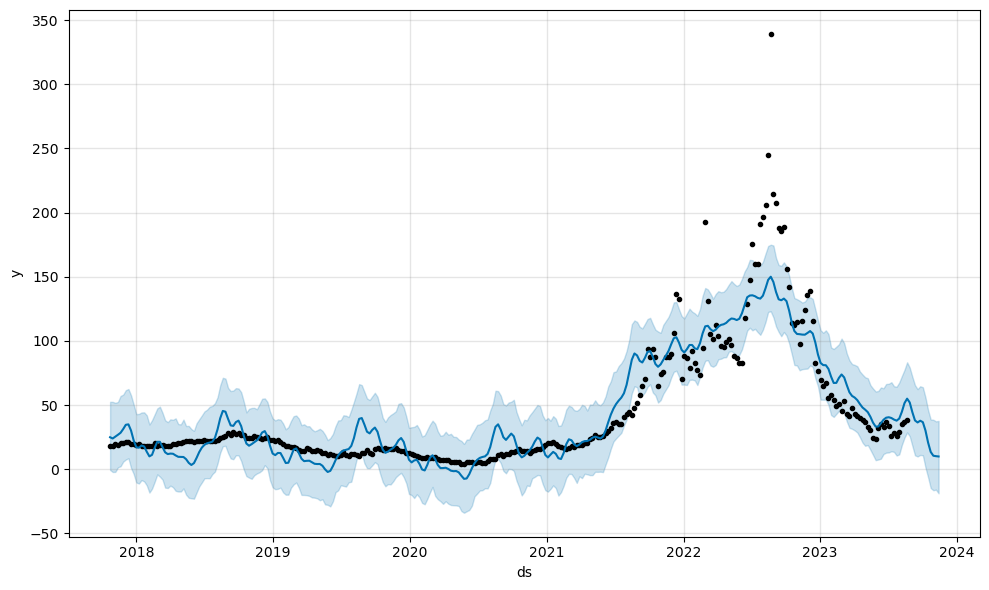

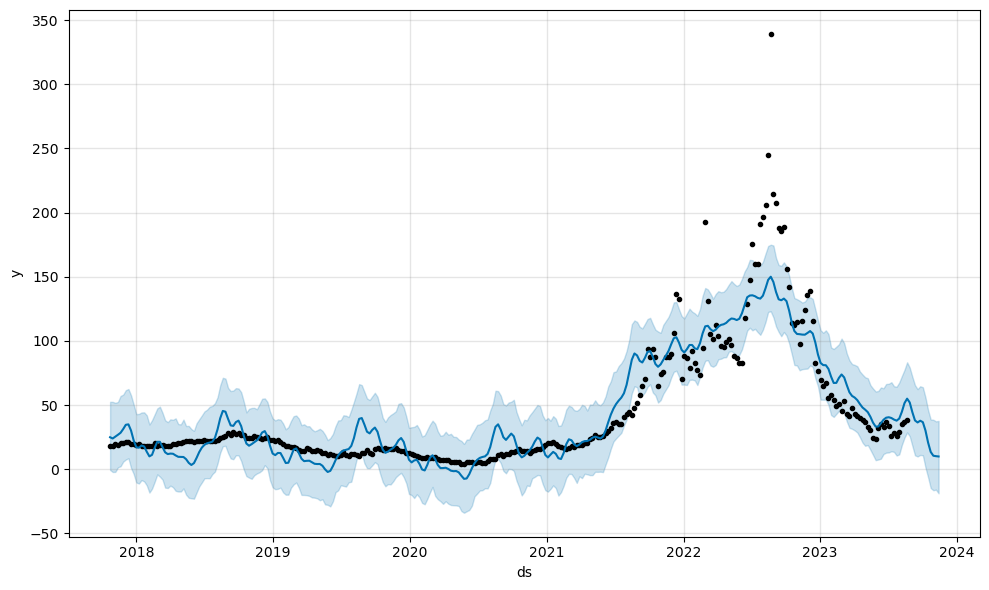

In [11]:
forecaster.model.plot(forecast)

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(forecaster.model, forecast)

In [17]:
fig = plot_plotly(
        forecaster.model,
        forecast,
        xlabel="Data",
        ylabel="Prezzi TTF (€/smc)"
)


In [24]:
forecaster.model.history

,ds,y,floor,t,y_scaled
0,2017-10-23,18.150000,0,0.000000,0.053509
1,2017-10-30,18.309999,0,0.003289,0.053981
2,2017-11-06,19.820000,0,0.006579,0.058432
3,2017-11-13,18.950001,0,0.009868,0.055867
4,2017-11-20,20.455000,0,0.013158,0.060304
...,...,...,...,...,...
300,2023-07-24,25.841000,0,0.986842,0.076183
301,2023-07-31,28.853001,0,0.990132,0.085063
302,2023-08-07,35.299999,0,0.993421,0.104070
303,2023-08-14,36.410000,0,0.996711,0.107342
